In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import clear_output
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
!unzip /content/drive/MyDrive/archive/FPR/FPRDataset.zip
clear_output()

In [ ]:
print("Test Nodule:",len(os.listdir("FPRDataset/test/nodule")))
print("Test Non-Nodule:",len(os.listdir("FPRDataset/test/non-nodule")))

Test Nodule: 184
Test Non-Nodule: 4527


In [ ]:
BATCH_SIZE = 96
generator = ImageDataGenerator(rescale=1./255)

trainData = generator.flow_from_directory(
    "FPRDataset/train",
    target_size=(50,50),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='binary',
    shuffle = False
)

testData = generator.flow_from_directory(
    "FPRDataset/test",
    target_size=(50,50),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='binary',
    shuffle = False
)

Found 14131 images belonging to 2 classes.
Found 4711 images belonging to 2 classes.


In [ ]:
print(trainData.class_indices)
print(testData.class_indices)

{'nodule': 0, 'non-nodule': 1}
{'nodule': 0, 'non-nodule': 1}


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/archive/processed/best_checkpoint_model.h5")
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_3 (InputLayer)                 │ (None, 50, 50, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 48, 48, 50)          │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 24, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 22, 22, 64)          │          28,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 20, 20, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,344,119 (12.76 MB)

 Trainable params: 3,344,117 (12.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
with tf.device("/device:GPU:0"):
  testPred = model.predict(testData)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 305ms/step


In [ ]:
with tf.device("/device:GPU:0"):
  trainPred = model.predict(trainData)

148/148 ━━━━━━━━━━━━━━━━━━━━ 38s 254ms/step


In [ ]:
testPred

array([[0.27755046],
       [0.6982068 ],
       [0.43695912],
       ...,
       [0.9990607 ],
       [0.99900323],
       [0.96897095]], dtype=float32)

In [ ]:
test_y_true = testData.classes
test_y_pred = np.array([int(x>=0.5) for x in testPred])

<ipython-input-11-c60344079ed0>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_y_pred = np.array([int(x>=0.5) for x in testPred])


In [ ]:
train_y_true = trainData.classes
train_y_pred = np.array([int(x>=0.5) for x in trainPred])

<ipython-input-12-6d063cc0daaa>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  train_y_pred = np.array([int(x>=0.5) for x in trainPred])


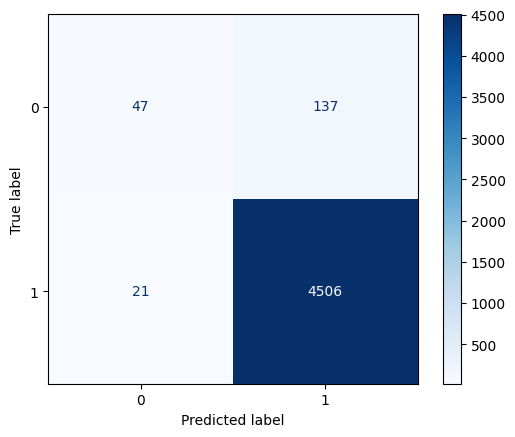

In [ ]:
ConfusionMatrixDisplay.from_predictions(test_y_true, test_y_pred, cmap='Blues')

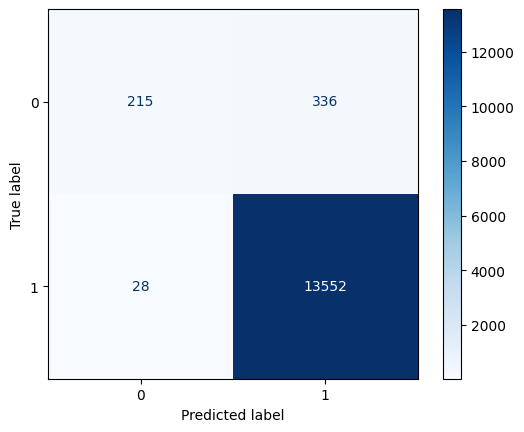

In [ ]:
ConfusionMatrixDisplay.from_predictions(train_y_true, train_y_pred, cmap='Blues')